# Exercise 9: Cognitive Data Analysis (⭐️⭐️⭐️)

We have collected behavioural and cognitive data from 100 people as part of a study called GBIT (Great Britain Intelligence Test). The data consists in their performance in three cognitive tasks, as well as their demographics and measures of their mental health. This data are provided in two separate dataframes: cognitive.csv contains the results in the cognitive tasks, and demographics.csv contains the answers from questionnaires. The data were anonymised and a basic processing was already completed. The aim of this exercise is to properly clean the data and run some statistical tests to analyse them.

IMPORTANT: To be able to complete this exercise you must have completed the statistical theory and coding tutorial

## Data cleaning

1. Import the data in the format of a pandas dataframes.

In [101]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [102]:
df_cog = pd.read_csv('cognitive_primer.csv')
df_dem = pd.read_csv('demographics_primer.csv')

2. Check the column headers, shape of the dataframe and types of columns. There is a column that should be an integer and is, instead a string. Detect that column and change the variable type.

In [103]:
df_cog.head()

,user_id,SummaryScore_Blocks,RT_Blocks,timepoint_by_site,SummaryScore_VerbalAnalogies,RT_VerbalAnalogies,SummaryScore_WordDefinitions
0,ca8eba947d4c4c419321f26b85d89fc9,11.0,4577.0,tp1,15,6439.3600,17.0
1,13ba938814984873b73a70ef48e481c0,8.0,5554.0,tp1,8,5438.1786,17.0
2,a7252125-ecf8-4985-adb9-bf93e89142ec,14.0,4410.0,tp1,22,5166.8000,11.0
3,1d5ed00c406a443f974cbf511695c9d5,10.0,3522.0,tp1,34,3429.1190,13.0
4,a968d94b5d6344c6968c6ee840c5b944,11.0,4491.0,tp1,27,4087.0270,20.0


In [104]:
df_dem.tail()

,user_id,Sex,Education,Age,Handedness,Residence,Ethnicity,Occupation,Salary,Residence (County)
8305,3c8c33784419410a90425ba720378126,Male,02_Degree,82.0,Right handed,United Kingdom,White,Retired,NaN,NaN
8306,3c8c33784419410a90425ba720378126,Male,01_School,82.0,Right handed,United Kingdom,Asian or Asian British,Retired,NaN,NaN
8307,6218275f-15b2-4c7b-ba55-2838c9153010,Female,02_Degree,20.0,Right handed,United Kingdom,White,Student,NaN,Gloucestershire
8308,6218275f-15b2-4c7b-ba55-2838c9153010,Female,02_Degree,20.0,Right handed,United Kingdom,White,Student,NaN,NaN
8309,7152ef3105984cac9a8b784f5a314841,Female,01_School,60.0,Right handed,United Kingdom,White,Homemaker,NaN,Lanarkshire


In [105]:
np.shape(df_cog)

(8000, 7)

In [106]:
np.shape(df_dem)

(8310, 10)

In [107]:
df_cog.dtypes

user_id                          object
SummaryScore_Blocks             float64
RT_Blocks                       float64
timepoint_by_site                object
SummaryScore_VerbalAnalogies      int64
RT_VerbalAnalogies              float64
SummaryScore_WordDefinitions    float64
dtype: object

In [108]:
df_dem.dtypes

user_id                object
Sex                    object
Education              object
Age                   float64
Handedness             object
Residence              object
Ethnicity              object
Occupation             object
Salary                 object
Residence (County)     object
dtype: object

In [109]:
df_dem.Age.astype(int)

0       19
1       66
2       55
3       74
4       61
        ..
8305    82
8306    82
8307    20
8308    20
8309    60
Name: Age, Length: 8310, dtype: int64

3. Currently, the index of the dataframe is not easy to interpret. Change it and replace it with the values in the user_id

In [110]:
df_cog.index = df_cog.user_id
df_dem.index = df_dem.user_id

In [111]:
df_cog.head()

,user_id,SummaryScore_Blocks,RT_Blocks,timepoint_by_site,SummaryScore_VerbalAnalogies,RT_VerbalAnalogies,SummaryScore_WordDefinitions
user_id,,,,,,,
ca8eba947d4c4c419321f26b85d89fc9,ca8eba947d4c4c419321f26b85d89fc9,11.0,4577.0,tp1,15,6439.3600,17.0
13ba938814984873b73a70ef48e481c0,13ba938814984873b73a70ef48e481c0,8.0,5554.0,tp1,8,5438.1786,17.0
a7252125-ecf8-4985-adb9-bf93e89142ec,a7252125-ecf8-4985-adb9-bf93e89142ec,14.0,4410.0,tp1,22,5166.8000,11.0
1d5ed00c406a443f974cbf511695c9d5,1d5ed00c406a443f974cbf511695c9d5,10.0,3522.0,tp1,34,3429.1190,13.0
a968d94b5d6344c6968c6ee840c5b944,a968d94b5d6344c6968c6ee840c5b944,11.0,4491.0,tp1,27,4087.0270,20.0


In [112]:
df_dem.head()

,user_id,Sex,Education,Age,Handedness,Residence,Ethnicity,Occupation,Salary,Residence (County)
user_id,,,,,,,,,,
8162511fe0dc4d04afe57193a8804afa,8162511fe0dc4d04afe57193a8804afa,Male,01_School,19.0,Right handed,United Kingdom,White,Worker,NaN,NaN
95bc4b40-60e9-4342-8de2-55f6d7deef7d,95bc4b40-60e9-4342-8de2-55f6d7deef7d,Male,01_School,66.0,Right handed,United Kingdom,White,Retired,NaN,West Sussex
ac8098ba57d54e16a12bc8d72433ad0f,ac8098ba57d54e16a12bc8d72433ad0f,Male,01_School,55.0,Left handed,United Kingdom,White,Worker,£30-40K,Hampshire
95596ceabf6e45af80b6f5c9ab7ae2c8,95596ceabf6e45af80b6f5c9ab7ae2c8,Female,00_preGCSE,74.0,Right handed,United Kingdom,White,Unemployed/Looking for work,NaN,NaN
d76fe6d2ca0a4e11a8d9506b0b9fe2a7,d76fe6d2ca0a4e11a8d9506b0b9fe2a7,Male,01_School,61.0,Right handed,United Kingdom,White,Worker,£10-20K,Aberdeenshire


4. Find out which columns have missing values and how many there are for each column. If a column is more than 50% NA then drop it. Most of the analysis cannot be completed if the participants don't have demographics. So, after filtering the columns, filter the questionnaire dataframe for the remaining rows without missing values.

In [113]:
df_cog.isna().sum(axis=1)

user_id
ca8eba947d4c4c419321f26b85d89fc9        0
13ba938814984873b73a70ef48e481c0        0
a7252125-ecf8-4985-adb9-bf93e89142ec    0
1d5ed00c406a443f974cbf511695c9d5        0
a968d94b5d6344c6968c6ee840c5b944        0
                                       ..
827bbfac-bb57-42ba-8dad-2e74ae3d31a4    0
665efd6621d74307a6f0072a9ad115b5        0
7103cf2e-ee29-4959-be61-34d0041446e8    0
0a48f36e7ca546788526732b609d519c        0
9555f9b825b84bc29317965de7eacf93        0
Length: 8000, dtype: int64

In [114]:
df_cog.isna().sum(axis=0)

user_id                         0
SummaryScore_Blocks             0
RT_Blocks                       0
timepoint_by_site               0
SummaryScore_VerbalAnalogies    0
RT_VerbalAnalogies              1
SummaryScore_WordDefinitions    0
dtype: int64

In [115]:
df_dem.isna().sum(axis=0)

user_id                  0
Sex                      1
Education              226
Age                      0
Handedness               0
Residence                1
Ethnicity                0
Occupation             238
Salary                5145
Residence (County)    5114
dtype: int64

In [116]:
df_dem.drop(['Salary', 'Residence (County)'], axis=1, inplace=True)

In [117]:
to_remove = df_dem.isna().sum(axis=1) > 0

In [118]:
sum(to_remove)

239

In [119]:
df_dem = df_dem[~to_remove]

5. Find out if there are duplicates in both dataframes. If there are two rows that are fully duplicated, then keep the second entry. In case of the questionnaire dataframe, if a columrown is duplicated in the user_id, sex and Residence columns, but not the others, then drop both rows.

In [120]:
sum(df_cog.duplicated())

0

In [121]:
sum(df_dem.duplicated())

22

In [122]:
df_dem.drop_duplicates(subset = None, keep = "last", inplace=True)
df_dem

,user_id,Sex,Education,Age,Handedness,Residence,Ethnicity,Occupation
user_id,,,,,,,,
8162511fe0dc4d04afe57193a8804afa,8162511fe0dc4d04afe57193a8804afa,Male,01_School,19.0,Right handed,United Kingdom,White,Worker
95bc4b40-60e9-4342-8de2-55f6d7deef7d,95bc4b40-60e9-4342-8de2-55f6d7deef7d,Male,01_School,66.0,Right handed,United Kingdom,White,Retired
ac8098ba57d54e16a12bc8d72433ad0f,ac8098ba57d54e16a12bc8d72433ad0f,Male,01_School,55.0,Left handed,United Kingdom,White,Worker
95596ceabf6e45af80b6f5c9ab7ae2c8,95596ceabf6e45af80b6f5c9ab7ae2c8,Female,00_preGCSE,74.0,Right handed,United Kingdom,White,Unemployed/Looking for work
d76fe6d2ca0a4e11a8d9506b0b9fe2a7,d76fe6d2ca0a4e11a8d9506b0b9fe2a7,Male,01_School,61.0,Right handed,United Kingdom,White,Worker
...,...,...,...,...,...,...,...,...
4fccc5e37ece41d8999de0af4b026a30,4fccc5e37ece41d8999de0af4b026a30,Female,01_School,59.0,Right handed,United Kingdom,Asian or Asian British,Retired
3c8c33784419410a90425ba720378126,3c8c33784419410a90425ba720378126,Male,02_Degree,82.0,Right handed,United Kingdom,White,Retired
3c8c33784419410a90425ba720378126,3c8c33784419410a90425ba720378126,Male,01_School,82.0,Right handed,United Kingdom,Asian or Asian British,Retired


In [123]:
df_dem.drop_duplicates(subset = ['Sex', 'Residence', 'user_id'], keep = False, inplace=True)

6. The variable residence includes many different countries. Check how many people are from the United Kingdom and how many are from other countries. As you can see, there aren't many people from each one of the other individual countries. Replace the values in that column with UK for all people from United Kingdom, and Other for all the other countries.

In [124]:
df_dem.Residence.value_counts()

United Kingdom        6651
United States          280
Canada                  67
Australia               41
Ireland {Republic}      32
                      ... 
Benin                    1
Antigua & Deps           1
Nigeria                  1
Lithuania                1
Albania                  1
Name: Residence, Length: 85, dtype: int64

In [125]:
to_change = df_dem["Residence"] == 'United Kingdom'
df_dem.Residence[~to_change] = 'Other'

/var/folders/01/_3yj40_538g8lmscwcv139hm0000gp/T/ipykernel_4934/376824233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dem.Residence[~to_change] = 'Other'


In [129]:
df_dem.Residence = df_dem["Residence"].replace("United Kingdom", "UK")

In [130]:
df_dem.Residence.value_counts()

UK       6651
Other     832
Name: Residence, dtype: int64

7. Until now, you have worked with two separate dartaframes. But to be able to run the next steps of the analysis, you need to merge the two dataframes together. Merge together the dataframes based on the values in the user_id.

In [134]:
df_dem.drop(["user_id"], axis = 1, inplace=True)
df_cog.drop(["user_id"], axis = 1, inplace=True)

In [136]:
df_merged = pd.merge(df_cog, df_dem, on = "user_id")

## Data Analysis

1. Let's complete some descriptive statistics on the data. Check:

The distribution of the scores in the different cognitive tests using histogram and boxplot. Since you have 3 different cognitive tests, try to create a unique figure with 3 subplots.

In [137]:
df_merged.head()

,SummaryScore_Blocks,RT_Blocks,timepoint_by_site,SummaryScore_VerbalAnalogies,RT_VerbalAnalogies,SummaryScore_WordDefinitions,Sex,Education,Age,Handedness,Residence,Ethnicity,Occupation
user_id,,,,,,,,,,,,,
ca8eba947d4c4c419321f26b85d89fc9,11.0,4577.0,tp1,15,6439.3600,17.0,Male,02_Degree,65.0,Right handed,Other,White,Retired
13ba938814984873b73a70ef48e481c0,8.0,5554.0,tp1,8,5438.1786,17.0,Male,01_School,55.0,Right handed,UK,White,Unemployed/Looking for work
a7252125-ecf8-4985-adb9-bf93e89142ec,14.0,4410.0,tp1,22,5166.8000,11.0,Male,01_School,45.0,Left handed,UK,Asian or Asian British,Worker
1d5ed00c406a443f974cbf511695c9d5,10.0,3522.0,tp1,34,3429.1190,13.0,Male,01_School,26.0,Right handed,UK,White,Worker
a968d94b5d6344c6968c6ee840c5b944,11.0,4491.0,tp1,27,4087.0270,20.0,Male,02_Degree,57.0,Right handed,Other,White,Worker


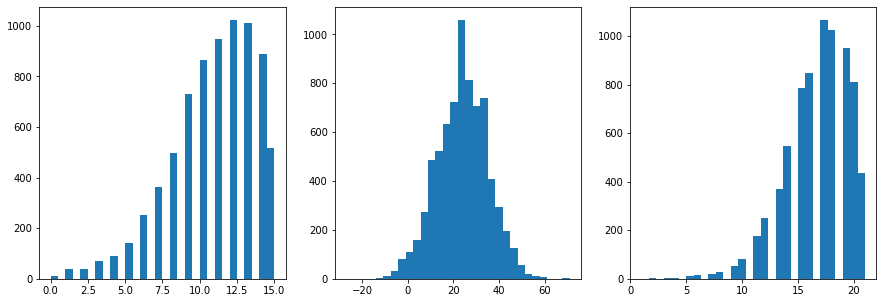

In [138]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
_ = plt.hist(df_merged.SummaryScore_Blocks, bins = 30)
plt.subplot(1,3,2)
_ = plt.hist(df_merged.SummaryScore_VerbalAnalogies, bins = 30)
plt.subplot(1,3,3)
_ = plt.hist(df_merged.SummaryScore_WordDefinitions, bins = 30)

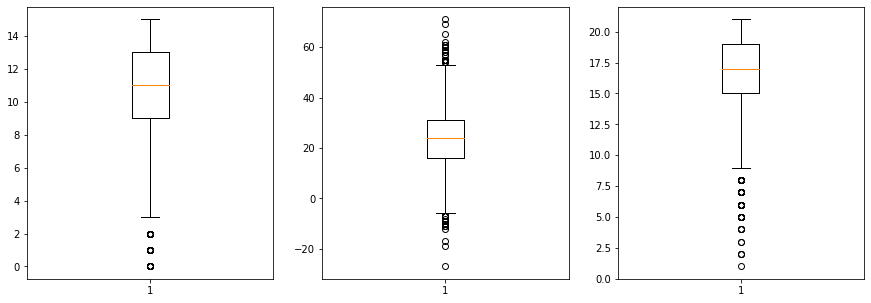

In [139]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
_ = plt.boxplot(df_merged.SummaryScore_Blocks)
plt.subplot(1,3,2)
_ = plt.boxplot(df_merged.SummaryScore_VerbalAnalogies)
plt.subplot(1,3,3)
_ = plt.boxplot(df_merged.SummaryScore_WordDefinitions)

If you see any outliers in the boxplot, use the rank_inverse_transform function explained in the lectures to remove those outliers

In [140]:
import rank_inv
df_merged.SummaryScore_Blocks = rank_inv.rank_INT(df_merged.SummaryScore_Blocks)
df_merged.SummaryScore_VerbalAnalogies = rank_inv.rank_INT(df_merged.SummaryScore_VerbalAnalogies)
df_merged.SummaryScore_WordDefinitions = rank_inv.rank_INT(df_merged.SummaryScore_WordDefinitions)

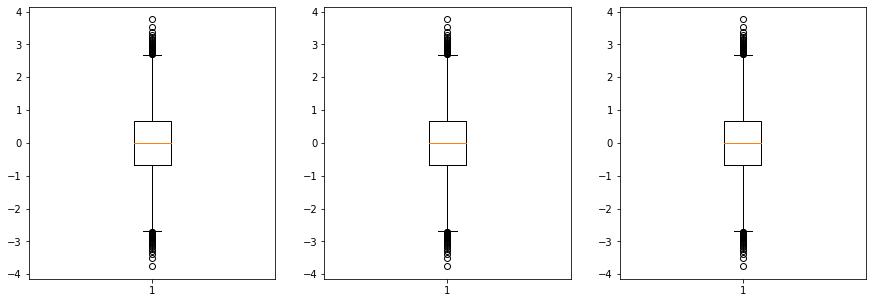

In [141]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
_ = plt.boxplot(df_merged.SummaryScore_Blocks)
plt.subplot(1,3,2)
_ = plt.boxplot(df_merged.SummaryScore_VerbalAnalogies)
plt.subplot(1,3,3)
_ = plt.boxplot(df_merged.SummaryScore_WordDefinitions)

Obtain the overall counts of the demographics: how many people do you have for each sex, ethnicity, occupation? Try to represent it using a pie chart and/or a bar chart.

In [144]:
count_sex = pd.DataFrame(df_merged["Sex"].value_counts())
count_sex

,Sex
Male,4132
Female,3263
Other,88


In [147]:
count_sex['Sex']

Male      4132
Female    3263
Other       88
Name: Sex, dtype: int64

<BarContainer object of 3 artists>

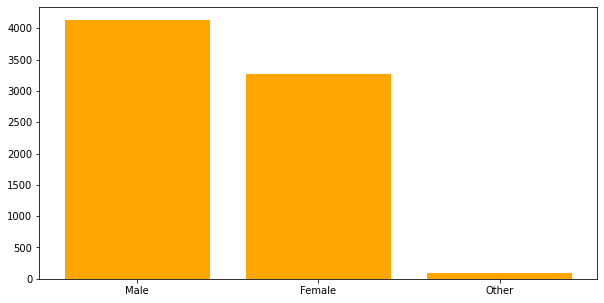

In [149]:
count_sex = pd.DataFrame(df_merged["Sex"].value_counts())
plt.figure(figsize = (10, 5))
plt.bar(count_sex.index, count_sex['Sex'], color = "orange")

<BarContainer object of 4 artists>

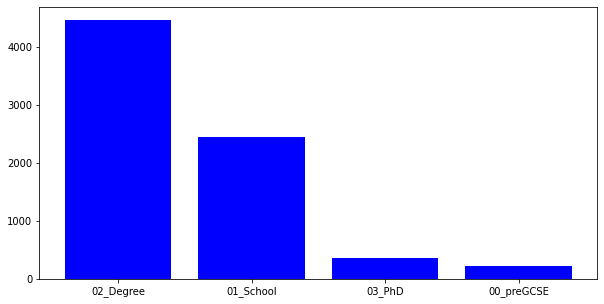

In [150]:
count_ed = pd.DataFrame(df_merged["Education"].value_counts())
plt.figure(figsize = (10, 5))
plt.bar(count_ed.index, count_ed['Education'], color = "blue")

<BarContainer object of 6 artists>

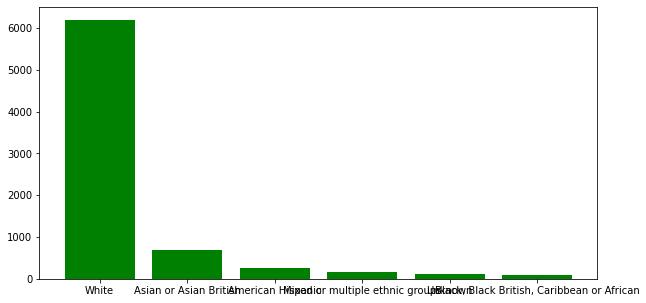

In [151]:
count_eth = pd.DataFrame(df_merged["Ethnicity"].value_counts())
plt.figure(figsize = (10, 5))
plt.bar(count_eth.index, count_eth['Ethnicity'], color = "green")

The words definition task is a language based task, so we would expect partcipants from the UK to perform better, or at least different, compared to participants from other non-english speaking countries. To verify this, we can run a t-test. Which t-test is the most appropriate? Check the decision tree.

IMPORTANT #1: in order to be able to run a t-test, you need to check if the data are normally distributed. To do this, you can use of the normality tests explained in the stats material.

IMPORTANT #2: Since you are completing multiple comparisons at once, you need to correct the p-values for multiple comparisons. How would you do it?

Once you have completed the analysis, try to interpret the results.

In [154]:
stats.shapiro(df_merged.SummaryScore_WordDefinitions)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999868869781494, pvalue=1.0)

In [155]:
stats.shapiro(df_merged.SummaryScore_Blocks)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999868869781494, pvalue=1.0)

In [156]:
stats.shapiro(df_merged.SummaryScore_VerbalAnalogies)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999868869781494, pvalue=1.0)

In [159]:
british = df_merged.SummaryScore_WordDefinitions[df_merged.Residence == 'UK']
non_british = df_merged.SummaryScore_WordDefinitions[df_merged.Residence == 'Other']
british

user_id
13ba938814984873b73a70ef48e481c0        0.043559
a7252125-ecf8-4985-adb9-bf93e89142ec   -1.646849
1d5ed00c406a443f974cbf511695c9d5       -1.125253
a2013513-92a6-4485-b717-b701523dc8cd   -0.953388
efa95315bf1d42a5adf08630a1682d6e       -0.459871
                                          ...   
3305ee07d5ab4141911c837c05518376        0.036519
827bbfac-bb57-42ba-8dad-2e74ae3d31a4   -1.217013
7103cf2e-ee29-4959-be61-34d0041446e8    1.563095
0a48f36e7ca546788526732b609d519c       -1.515987
9555f9b825b84bc29317965de7eacf93        1.963305
Name: SummaryScore_WordDefinitions, Length: 6651, dtype: float64

In [160]:
tstat, pval = stats.ttest_ind(british, non_british)
print(pval)
print(tstat)

print(np.mean(british))
print(np.mean(non_british))

0.14878978132322637
1.4439682543621986
0.0059018064211470616
-0.04717898378251095


3. Age is well-known to be associated to cognitive performance. Can you check whether there is any correlation between the age of participants and their performance in the cognitive tests? What type of correlation test should you use?

(array([ 675., 1114., 1550., 1259., 1293., 1033.,  441.,  109.,    5.,
           4.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <BarContainer object of 10 artists>)

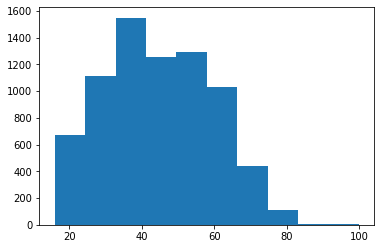

In [161]:
plt.hist(df_merged.Age)

In [162]:
stats.shapiro(df_merged.Age)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9861085414886475, pvalue=1.828360484511832e-26)

In [164]:
rvalue, pvalue = stats.spearmanr(df_merged.Age, df_merged.SummaryScore_WordDefinitions)
print(rvalue)
print(pvalue)

0.3139051396392162
8.938727901910954e-171


In [165]:
df_merged.Education.value_counts()

02_Degree     4464
01_School     2449
03_PhD         352
00_preGCSE     218
Name: Education, dtype: int64

In [167]:
no_school = df_merged.SummaryScore_WordDefinitions[df_merged.Education == '00_preGCSE']
school = df_merged.SummaryScore_WordDefinitions[df_merged.Education == '01_School']
degree = df_merged.SummaryScore_WordDefinitions[df_merged.Education == '02_Degree']
phd = df_merged.SummaryScore_WordDefinitions[df_merged.Education == '03_PhD']

4. Another interesting thing to investigate is whether there is a difference in cognitive performance among the participants with different educations. To be able to do this, since the educational backgrounds are more than two, you need to run an ANOVA. Which ANOVA should you run?

In [168]:
fstat, pval = stats.f_oneway(no_school, school, degree, phd)
print(fstat,pval)

120.72197250283021 2.3650413320781765e-76


5. Do you think we can predict the score in different cognitive tasks based on the demographics? To find out, let's build one (or more) multiple linear regression models that try to predict the cognitive score in one (or more) tasks.

IMPORTANT: It would be better to hot-encode the categorical variable for education and to input the age data in decades rather than as a continuous variables.

Interpret the meaning of the output results.

In [170]:
df_final = pd.get_dummies(data = df_merged, columns= ['Education'])

In [172]:
age_decades = df_final.Age/10
age_decades= age_decades.astype(int)*10

In [ ]:
df_final.Age = age_decades

In [175]:
model = sm.OLS.from_formula('SummaryScore_WordDefinitions ~ Age + Sex + Education_00_preGCSE + Education_01_School + Education_02_Degree + Education_03_PhD', data = df_final) #Here we mention the variable names we want to include and the dataset
results = model.fit() #Then we run the regression model
print(results.summary()) #Finally, we tell Python to create a summary of all the results and print it

                                 OLS Regression Results                                 
Dep. Variable:     SummaryScore_WordDefinitions   R-squared:                       0.158
Model:                                      OLS   Adj. R-squared:                  0.157
Method:                           Least Squares   F-statistic:                     233.6
Date:                          Wed, 09 Nov 2022   Prob (F-statistic):          2.19e-274
Time:                                  17:55:01   Log-Likelihood:                -9972.5
No. Observations:                          7483   AIC:                         1.996e+04
Df Residuals:                              7476   BIC:                         2.001e+04
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------